<a href="https://colab.research.google.com/github/afujii/class/blob/main/%E6%98%9F%E3%81%AE%E7%8E%8B%E5%AD%90%E6%A7%98%EF%BC%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

以下では、「星の王子様」文を参考例として、文章中の単語数を分析してみます。

In [ ]:
sentences = """
Once when I was six years old I saw a magnificent picture in a book, called True Stories from Nature, about the primeval forest. It was a picture of a boa constrictor in the act of swallowing an animal. Here is a copy of the drawing.
Boa
In the book it said: "Boa constrictors swallow their prey whole, without chewing it. After that they are not able to move, and they sleep through the six months that they need for digestion."
I pondered deeply, then, over the adventures of the jungle. And after some work with a colored pencil I succeeded in making my first drawing. My Drawing Number One. It looked something like this:
Hat
I showed my masterpiece to the grown-ups, and asked them whether the drawing frightened them.
But they answered: "Frighten? Why should any one be frightened by a hat?"
My drawing was not a picture of a hat. It was a picture of a boa constrictor digesting an elephant. But since the grown-ups were not able to understand it, I made another drawing: I drew the inside of a boa constrictor, so that the grown-ups could see it clearly. They always need to have things explained. My Drawing Number Two looked like this:
Elephant inside the boa
The grown-ups' response, this time, was to advise me to lay aside my drawings of boa constrictors, whether from the inside or the outside, and devote myself instead to geography, history, arithmetic, and grammar. That is why, at the age of six, I gave up what might have been a magnificent career as a painter. I had been disheartened by the failure of my Drawing Number One and my Drawing Number Two. Grown-ups never understand anything by themselves, and it is tiresome for children to be always and forever explaining things to them.
So then I chose another profession, and learned to pilot airplanes. I have flown a little over all parts of the world; and it is true that geography has been very useful to me. At a glance I can distinguish China from Arizona. If one gets lost in the night, such knowledge is valuable.
In the course of this life I have had a great many encounters with a great many people who have been concerned with matters of consequence. I have lived a great deal among grown-ups. I have seen them intimately, close at hand. And that hasn't much improved my opinion of them.
Whenever I met one of them who seemed to me at all clear-sighted, I tried the experiment of showing him my Drawing Number One, which I have always kept. I would try to find out, so, if this was a person of true understanding. But, whoever it was, he, or she, would always say:
"That is a hat."
Then I would never talk to that person about boa constrictors, or primeval forests, or stars. I would bring myself down to his level. I would talk to him about bridge, and golf, and politics, and neckties. And the grown-up would be greatly pleased to have met such a sensible man.
"""

単語の集合を作ります。スペースで区切って、小文字に統一し、余計な制御記号を除きます。以下の例では、「hasn't 」がうまく処理されませんが目をつぶります。

In [ ]:
words = [w.lower()  for w in sentences.split()]
print(words[30:40])
# animal. など abcd...xyz 以外の文字「.」を含む場合に修正します。
words2 = []
letters = 'abcdefghijklmnopqrstuvwxyz'
for w in words:
  tmp = []
  for c in w:
    if c in letters:
      tmp.append(c)
    else:
      continue
  words2.append( "".join(tmp))
print(words2[30:40])

['boa', 'constrictor', 'in', 'the', 'act', 'of', 'swallowing', 'an', 'animal.', 'here']
['boa', 'constrictor', 'in', 'the', 'act', 'of', 'swallowing', 'an', 'animal', 'here']


単語の出現回数を調べます。
はじめに辞書型の変数counts を定義します。

In [ ]:
counts = dict()

words2　から一つずつ単語を取り出し、出現回数を数えていきます。

In [ ]:
for w in words2:
  if w in counts.keys():
    counts[w] += 1
  else:
    counts[w] = 1 # 初めて登場する単語

辞書型に対して　.items() を適用すると キーと値のリスト　[（key,value) ,　...]が得られます。小かっこ() で括られたデータ型はタプル型です。それを値の降順にしてprintします。頻出単語が分かります。以下の＊　の部分は、リストを降順に並べ替える処理をしています。（詳細は別途説明します）

In [ ]:
word_list = list(counts.items())
#print(word_list)
word_list.sort(key=lambda x:x[1],reverse = True) # <----*
print(word_list)


[('the', 23), ('i', 22), ('a', 22), ('of', 17), ('to', 17), ('and', 15), ('it', 10), ('drawing', 10), ('my', 10), ('have', 9), ('boa', 8), ('that', 8), ('was', 7), ('in', 6), ('is', 6), ('one', 6), ('grownups', 6), ('them', 6), ('would', 6), ('they', 5), ('number', 5), ('this', 5), ('picture', 4), ('hat', 4), ('always', 4), ('or', 4), ('at', 4), ('been', 4), ('six', 3), ('true', 3), ('from', 3), ('about', 3), ('constrictor', 3), ('constrictors', 3), ('not', 3), ('then', 3), ('with', 3), ('but', 3), ('be', 3), ('by', 3), ('inside', 3), ('so', 3), ('me', 3), ('great', 3), ('magnificent', 2), ('book', 2), ('primeval', 2), ('an', 2), ('after', 2), ('able', 2), ('need', 2), ('for', 2), ('over', 2), ('looked', 2), ('like', 2), ('whether', 2), ('frightened', 2), ('why', 2), ('elephant', 2), ('understand', 2), ('another', 2), ('things', 2), ('two', 2), ('myself', 2), ('geography', 2), ('had', 2), ('never', 2), ('all', 2), ('if', 2), ('such', 2), ('many', 2), ('who', 2), ('met', 2), ('him', 2),

文字の出現頻度を図にしてみましょう。word_listを使います。グラフ表示用のライブラリをimport して使います。

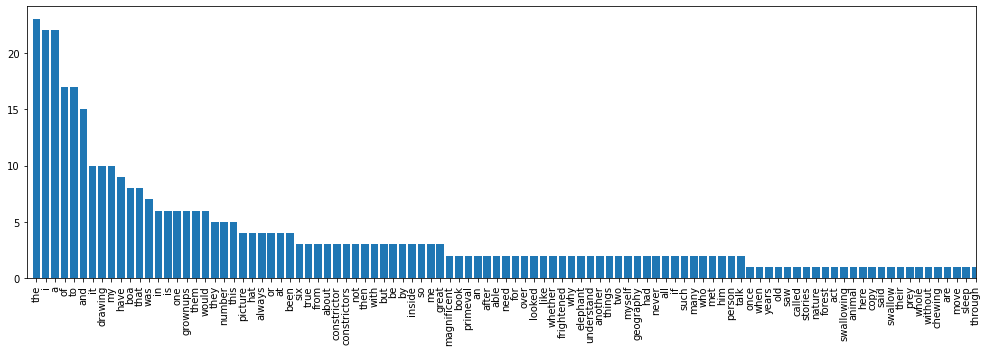

In [ ]:
from matplotlib import pyplot as plt 

x = [word_list[i][0] for i in range(len(word_list))]
y = [word_list[i][1] for i in range(len(word_list))]
plt.figure(figsize=(17,5))
plt.bar(x,y)
plt.xticks(rotation=90)# 文字の立方向表示
plt.xlim(-1,100)#文字表示領域の位置と幅
plt.show()

WordCloud という表示方法を試してみます。ライブラリが必要です。

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud

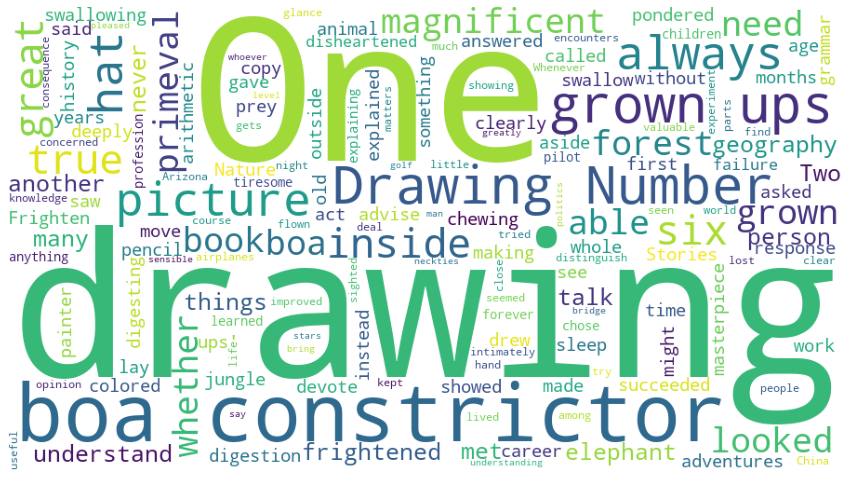

In [ ]:
wordcloud = WordCloud(background_color="white",width=900, height=500).generate(sentences)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

上記の例では、WordCloud ライブラリにあらかじめ用意されている generate関数を使いました。その機能を利用すると、「the」や「a」など文章の特徴を表すのにあまり効果の無い単語（Stop Words と呼ぶ）を取り除いたうえで、頻度を計算し、頻度に合わせて自動的に単語のレイアウトをしてくれます。
